<a href="https://colab.research.google.com/github/ThuyLienNguyen/FDSS/blob/main/FDSS_RidgeRegression510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import time
import numpy.linalg as la


from scipy.sparse import rand
M=5000
N = 10000


a = rand(M, N, density=0.00001, format='csr')




A=a.todense()
eps=0.01

def logistic_smoothness(X):
    return  np.max(la.eigvalsh(X.T @ X))+ 2*0.0001

def mu(X):
    return np.min(la.eigvalsh(X.T @ X))+ 2*0.0001

L=logistic_smoothness(A)
mu=mu(A)
print('L',L)
print('mu',mu)
b=np.random.rand(M,1)
B=A.T
#b=np.random.rand(r,1)
Bb=np.dot(B,b)
Aa=np.dot(B,A)



Mx=np.identity(N) - 0.1*Aa

print(Mx.shape)

x_opt = np.linalg.lstsq(A, b, rcond=None)[0]



def gradient(x):
  f=(np.dot(Aa,x)-Bb)+ 0.0002*x
  return np.array(f)

def f(x):
  f=np.dot(A,x)-b
  return 1/2*np.linalg.norm(f)**2+0.0001* np.linalg.norm(x)**2


x0 = np.random.rand(N,1)


L 1.3824874591115377
mu 0.00019999999999993862
(10000, 10000)


In [2]:
from numpy import identity
lam=0.0001
C= identity(N)
M_1= np.dot(A.T,A) + 2*lam*np.dot(C.T,C)
N_1 = np.linalg.inv(M_1)
X_opt = np.dot(N_1, np.dot(A.T,b))
F_min = 1/2* np.linalg.norm(np.dot(A,X_opt) -b)**2 + lam*np.linalg.norm(X_opt)**2


In [3]:
MaxTime=100

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def nesterov_agd(x0, num_iterations):
    TimeN=[]
    TimeN.append(0)
    x = y = x0
    t = 1
    la=1/L
    i=0
    grad_norm_listN = []
    diff_list=[]
    grad_norm_listN.append(np.log10(np.linalg.norm(gradient(x0))))
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))
    while True:
        start_time = time.time()
        i=i+1
        grad = gradient(y)


        y1 = y - la * grad
        t1 = 0.5 * (1 + np.sqrt(1 + 4 * t**2))
        y = y1 + (t - 1) / t1 * (y1 - x)

        x, t = y1, t1
        grad_norm = np.linalg.norm( gradient(x))
        grad_norm_listN.append(np.log10(grad_norm))

        TimeN.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))

        if np.sum(TimeN) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break

    return x, grad_norm_listN, TimeN, Dif, DifF






learning_rateN = 0.001


momentum_rate=0.1



# Number of iterations
num_iterations = 500



x_minN, grad_norm_listN, TimeN, DifN, DifFN = nesterov_agd(x0, num_iterations)






Stopped by MaxTime at  761 -th iterattion


In [5]:
import numpy as np
import matplotlib.pyplot as plt


def nesterov_agdC(x0, num_iterations):
    TimeN=[]
    TimeN.append(0)
    x = xp = x0
    t = 1
    la=1/L
    i=0
    grad_norm_listN = []
    diff_list=[]
    grad_norm_listN.append(np.log10(np.linalg.norm(gradient(x0))))
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))
    le =0.1
    while True:
        start_time = time.time()
        i=i+1


        grad = gradient(x)



        beta = i/(i+3)
        x_p =x
        x = x + beta*(x -xp) - beta*le**2*grad
        xp=x_p
        grad_norm = np.linalg.norm( gradient(x))
        grad_norm_listN.append(np.log10(grad_norm))

        TimeN.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        #if np.linalg.norm(grad_f(x, A, b)) < eps:

        if np.sum(TimeN) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break


    return x, grad_norm_listN, TimeN, Dif, DifF




learning_rateN = 0.001


x_minN_C, grad_norm_listN_C, TimeN_C, DifN_C, DifFN_C = nesterov_agdC(x0, num_iterations)







Stopped by MaxTime at  762 -th iterattion


In [6]:
learning_rateF = 0.00001
def fixedtimevarying_accelerated_gradient0(x0, learning_rate, la, num_iterations):
    """
    Fixed time accelerated gradient algorithm
    """
    TimeF0=[]
    TimeF0.append(0)

    x = x0
    grad0 = gradient(x0)
    grad_norm_listF0 = []
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))
    le=0.000001
    k=0
    n=0
    i=0

    grad_norm_listF0.append(np.log10(np.linalg.norm(grad0)))

    p=2/3
    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_listF0.append(np.log10(grad_norm))


        x= x-le*(100/((le*i)**k*(np.linalg.norm(grad))**(p)) +50/((le*i)**n*(np.linalg.norm(grad))**(-2/3)))#-le*50

        TimeF0.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))


        if np.sum(TimeF0) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF0, TimeF0, Dif, DifF

x_minF0, grad_norm_listF0,TimeF0, Dif0, DifF0 = fixedtimevarying_accelerated_gradient0(x0, learning_rateF, la, num_iterations)

Stopped by MaxTime at  1528 -th iterattion


In [7]:


def momentum_1(x_0):
    """
    Fixed time accelerated gradient algorithm
    """
    TimeF2=[]
    TimeF2.append(0)
    x = x_0
    grad0 = gradient(x_0)
    grad_norm_listF2 = []


    grad_norm_listF2.append(np.log10(np.linalg.norm(grad0)))
    v = np.zeros_like(grad0)
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))



    i=0

    #ga=0.9*2/(L+mu) #ga=1
    ga=1

    le = 0.001

    i=0
    #la =0.02/ga #  la =0.1
    la =0.1
    al =1
    #muy = 4/ga
    muy=5

    k=0
    m=0


    n=0
    p=1/3
    q=-2/3
    b1=100
    b2=10


    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_listF2.append(np.log10(grad_norm))
        grad_m = max(np.linalg.norm(grad), np.linalg.norm(grad-al*v) )

        x = x-le*v*(b1/((i*le)**k*(grad_m**p)) + b2/(grad_m**q))
        v = v+le*(la*(grad-al*v) + muy*gradient(x-al*v))*(b1/((i*le)**k*(grad_m**(p))) + b2/(grad_m**q))#+le*100*(nu*grad-al*v)
        TimeF2.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        #if np.linalg.norm(grad_f(x, A, b)) < eps:
        #if np.linalg.norm(gradient(x))<eps:
         # break

        if np.sum(TimeF2) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF2, TimeF2, Dif, DifF

x_minF1, grad_norm_listF1,TimeF1, Dif1, DifF1 = momentum_1(x0)

Stopped by MaxTime at  756 -th iterattion


In [8]:


def momentum_2(x_0):
    """
    Fixed time accelerated gradient algorithm
    """
    TimeF2=[]
    TimeF2.append(0)
    x = x_0
    grad0 = gradient(x_0)
    grad_norm_listF2 = []


    grad_norm_listF2.append(np.log10(np.linalg.norm(grad0)))
    v = np.zeros_like(grad0)
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))


    le = 0.001
    i=0
    la =0.1
    k=0
    m=0
    ga=1
    nu=1/(L+mu)
    print('nu',nu)
    c=1-nu*mu
    c_3= 1 + c**2/(1-c**2) +(2*c**2/(1-c**2)**(1/2))
    c_4= 1 +(3*c**2/(1-c**2))

    al =min(max(c_3, c_4), ((3+c**2)/(2*la*(1-c**2)))**(1/2)) +1


    n=0
    p=1/3
    q=-2/3
    b1=100
    b2=0.1


    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_listF2.append(np.log10(grad_norm))
        grad_m = max(np.linalg.norm(grad), np.linalg.norm(grad-al*v))


        x = x-le*v*(b1/((i*le)**k*(grad_m**p)) + b2/(grad_m**q))
        v = v+le*la*(grad-al*v)*(b1/((i*le)**k*(grad_m**(p))) + b2/(grad_m**q))#+le*100*(nu*grad-al*v)
        TimeF2.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))


        if np.sum(TimeF2) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF2, TimeF2, Dif, DifF

x_minF1_1, grad_norm_listF1_1,TimeF1_1, Dif1_1, DifF1_1 = momentum_2(x0)

nu 0.723229239847566
Stopped by MaxTime at  1519 -th iterattion


In [9]:
#Attouch paper


#le = 1




mu =10

def Fb(x,z):
  return 1/2* np.linalg.norm(np.dot(A,x) -b)**2 + lam*np.linalg.norm(z)**2


def Gradient_x(x,z,y,yp, al_t, le):

  #A1=np.dot(A.T,np.dot(A,x_0))- np.dot(A.T,b)+x_2 + ga**2*(x_0-x_1)
  Co=np.dot(C,x)-z
  A1 = np.dot(A.T,np.dot(A,x))- np.dot(A.T,b)+np.dot(C.T,y + al_t*(y - yp)/le + mu*Co)
  A1_1 = np.dot(A.T,np.dot(A,x))- np.dot(A.T,b)
  return A1, A1_1

def Gradient_z(x,z, y, yp, al_t, le):
  Co=np.dot(C,x)-z
  A2=2*lam*z-y -al_t*(y - yp)/le - mu*Co
  A2_1 = 2*lam*z
  return A2, A2_1

def Gradient_y(x,xp,z, zp, al_t, le):
  Co=np.dot(C,x)-z

  A3= - np.dot(C, x + al_t*(x - xp)/le) - (z + al_t*(z - zp)/le)
  A3_1 = -Co
  return A3, A3_1





def FT2(x,z,y):
    """
    Fixed time accelerated gradient algorithm
    """

    le=0.01

    xp=x
    yp =y
    zp=z
    al_t =0

    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(abs(Fb(x,z) - F_min)))
    grad0=((np.linalg.norm(Gradient_x(x,z,y,yp,al_t,le)[1])**2) + (np.linalg.norm(Gradient_z(x,z, y, yp, al_t, le)[1])**2) )**(1/2)


    TimeF=[]
    TimeF.append(0)
    #start_time = time()


    grad_norm_listF = []
    i=0
    grad_norm_listF.append(np.log10(grad0))






    while True:
        start_time = time.time()
        i=i+1

        #al_t = 0.25*i*le
        al_t = 0.5*i*le
        #al_t = 1
        #al_t = 0.5

        eta =5
        #gam = (eta + 0.25)/al_t
        gam = (eta + 0.5)/al_t
        #gam = eta
        #gam = 10

        #be =(i*le)**2
        be =1

        #be = np.exp(i*le)
        #be =0.1




        xp_1=x
        g_x = Gradient_x(x,z,y,yp,al_t,le)[0]

        x= 1/(1 + gam*le)*((2 + gam*le)*x- xp - le**2*be*g_x)
        xp=xp_1

        zp_1 =z

        g_z = Gradient_z(x,z, y, yp, al_t, le)[0]
        z = 1/(1 + gam*le)*((2 + gam*le)*z- zp - le**2*be*g_z)
        zp=zp_1

        yp_1 =y
        g_y = Gradient_y(x,xp,z, zp, al_t, le)[0]
        y = 1/(1 + gam*le)*((2 + gam*le)*y- yp - le**2*be*g_y)

        yp=yp_1

        grad=((np.linalg.norm(Gradient_x(x,z,y,yp,al_t,le)[1])**2) + (np.linalg.norm(Gradient_z(x,z, y, yp, al_t, le)[1])**2))**(1/2)





        TimeF.append(time.time() - start_time)


        #Dif1.append(np.linalg.norm(x_0-X_opt) + np.linalg.norm(x_1-X_opt))
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(abs(Fb(x,z) - F_min)))

        grad_norm_listF.append(np.log10(grad))
        #if np.linalg.norm(grad_f(x, A, b)) < eps:

        if np.sum(TimeF) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF, TimeF, Dif, DifF




x_minF2, grad_norm_listF2, TimeF2, Dif2, DifF2= FT2(x0, x0, x0)






Stopped by MaxTime at  547 -th iterattion


In [10]:
def fixedtime_accelerated_gradient(x0, learning_rate, la, num_iterations):
    """
    Fixed time accelerated gradient algorithm
    """
    x = x0
    v = np.zeros_like(x)
    TimeF3=[]
    TimeF3.append(0)
    grad0 = gradient(x)
    grad_norm_list = []


    grad_norm_list.append(np.log10(np.linalg.norm(grad0)))

    Dif=[]
    DifF=[]
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))
    diff_list=[]
    learning_rate = 0.01
    p=20
    q=1.98
    la=50
    i=0
    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_list.append(np.log10(grad_norm))
        #diff_list.append(np.log10(np.linalg.norm(x-x1)))
        v = v+ learning_rate*la*(grad-v)*(1/(np.linalg.norm(grad-v))**((p-2)/(p-1)) + 1/(np.linalg.norm(grad-v)**((q-2)/(q-1))))
        if grad_norm >= np.linalg.norm(grad -v):
            x= x-learning_rate*v*(1/(grad_norm)**((p-2)/(p-1)) + 1/(grad_norm)**((q-2)/(q-1)))
        else:
            x= x-learning_rate*v
        TimeF3.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        if np.sum(TimeF3) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_list, TimeF3, Dif, DifF




x_minF4, grad_norm_listF4, TimeF4, Dif4, DifF4 = fixedtime_accelerated_gradient(x0, learning_rateF, la, num_iterations)

Stopped by MaxTime at  1529 -th iterattion


In [11]:
def FixF(x0, learning_rate, la, num_iterations):
    """
    Fixed time accelerated gradient algorithm
    """
    x = x0
    v = np.zeros_like(x)
    TimeF3=[]
    TimeF3.append(0)
    grad0 = gradient(x)
    grad_norm_list = []


    grad_norm_list.append(np.log10(np.linalg.norm(grad0)))

    Dif=[]
    DifF=[]
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))
    diff_list=[]
    learning_rate = 0.01

    i=0
    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_list.append(np.log10(grad_norm))

        x= x-learning_rate*grad*(30/(grad_norm)**(2/3) + 1/i*1/(grad_norm)**(-2/3))

        TimeF3.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        if np.sum(TimeF3) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_list, TimeF3, Dif, DifF




x_minF5, grad_norm_listF5, TimeF5, Dif5, DifF5 = FixF(x0, learning_rateF, la, num_iterations)

Stopped by MaxTime at  1520 -th iterattion


In [12]:
#v0 = np.random.rand(N,1)
def GF1(x0, learning_rate, num_iterations):
    """
    Fixed time accelerated gradient algorithm
    """
    TimeF3=[]
    TimeF3.append(0)
    x = x0
    grad0 = gradient(x0)
    grad_norm_listF3 = []

    grad_norm_listF3.append(np.log10(np.linalg.norm(grad0)))
    v=x0

    i=0
    le=0.05
    p0=2.1
    q0=1.98
    p=(p0-2)/(p0-1)
    q = (q0-2)/(q0-1)

    ep=0.000000

    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))




    while True:
    #for i in range(num_iterations):
        i=i+1
        #print('i',i)
        start_time= time.time()
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_listF3.append(np.log10(grad_norm))


        v = 0.1*(v/(np.abs(v)**p+ep)+v/(np.abs(v)**q+ep))+0.9*grad
        x = x - le*(v+ grad/(np.abs(grad)**p) + grad/(np.abs(grad)**q))


        TimeF3.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        #if np.linalg.norm(grad_f(x, A, b)) < eps:

        if np.sum(TimeF3) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF3, TimeF3, Dif, DifF

x_minGF1, grad_norm_listGF1, TimeGF1, DifGF1, DifFGF1 = GF1(x0, learning_rateF, num_iterations)




Stopped by MaxTime at  1504 -th iterattion


In [13]:
from itertools import product
import numpy as np
from itertools import product
import time

#def momentum_1_F(x_0, ga =0.9*2/(L+mu), la=0.01*(L+mu), muy=2*(L+mu), p=1/3, q=-2/3, b1=100, b2=10):
def momentum_1_G(x_0, ga =1, la=0.1, muy=5, p=1/3, q=-2/3, b1=100, b2=10):
    """
    Fixed time accelerated gradient algorithm
    """
    TimeF2=[]
    TimeF2.append(0)
    x = x_0
    grad0 = gradient(x_0)
    grad_norm_listF2 = []


    grad_norm_listF2.append(np.log10(np.linalg.norm(grad0)))
    v = np.zeros_like(grad0)
    Dif =[]
    DifF = []
    Dif.append(np.log10(np.linalg.norm(x-X_opt)))
    DifF.append(np.log10(f(x) - F_min))

    #ga=0.9*2/(L+mu)



    le = 0.001

    i=0
    #la =0.02/ga

    al =1
    #muy = 4/ga


    k=0
    m=0

    n=0




    while True:
    #for i in range(num_iterations):
        start_time=time.time()
        i=i+1
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        grad_norm_listF2.append(np.log10(grad_norm))
        grad_m = max(ga*np.linalg.norm(grad), np.linalg.norm(ga*grad-al*v) )
        #diff_list.append(np.log10(np.linalg.norm(x-x1)))

        x = x-le*v*(b1/((i*le)**k*(grad_m**p)) + b2/(grad_m**q))
        v = v+le*(la*(ga*grad-al*v) + ga*muy*gradient(x-al*v))*(b1/((i*le)**k*(grad_m**(p))) + b2/(grad_m**q))#+le*100*(nu*grad-al*v)
        TimeF2.append(time.time() - start_time)
        Dif.append(np.log10(np.linalg.norm(x-X_opt)))
        DifF.append(np.log10(f(x) - F_min))
        #if np.linalg.norm(grad_f(x, A, b)) < eps:
        #if np.linalg.norm(gradient(x))<eps:
         # break

        if np.sum(TimeF2) > MaxTime:
          print('Stopped by MaxTime at ',i,'-th iterattion')
          break
    return x, grad_norm_listF2, TimeF2, Dif, DifF


x_minF1G, grad_norm_listF1G,TimeF1G, Dif1G, DifF1G = momentum_1_G(x0,ga=1.8/(L+mu), la = 0.005*(L+mu), muy = 3*(L+mu),p=1/3, q=-2/3,b1=100, b2=10)

Stopped by MaxTime at  772 -th iterattion


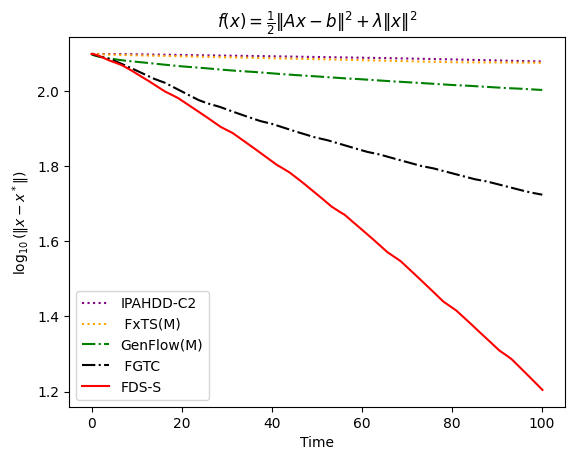

In [14]:


#plt.figure(figsize=(4,3))

plt.plot(np.cumsum(TimeF2), Dif2, color='purple', linestyle=':', label = 'IPAHDD-C2')

plt.plot(np.cumsum(TimeF4), Dif4, color='orange', linestyle=':', label = ' FxTS(M)')

plt.plot(np.cumsum(TimeGF1), DifGF1, color='green', linestyle='-.', label = 'GenFlow(M)')

#plt.plot(np.cumsum(TimeN_C), DifN_C, color='red', linestyle='--',label='Nesterov-C')
plt.plot(np.cumsum(TimeF5), Dif5, color='black', linestyle='-.', label = ' FGTC')

#plt.plot(np.cumsum(TimeF1), Dif1, color='blue', linestyle='-',label = 'FDS-S')
plt.plot(np.cumsum(TimeF1G), Dif1G, color='red', linestyle='-',label = 'FDS-S')
#plt.plot(np.cumsum(TimeF1_1), grad_norm_listF1_1, color='red', linestyle=':', dashes=(5, 2),label = 'FDS2')




plt.xlabel('Time')
plt.ylabel(''r'$\log_{10}(\|x-x^*\|)$')
plt.title(''r'$f(x) = \frac{1}{2}\|Ax-b\|^2 + \lambda \|x\|^2$')
plt.legend()
plt.show()

Total parameter combinations: 9
Stopped by MaxTime at  765 -th iterattion
Params: {'p': 0.3333333333333333, 'q': -0.3333333333333333}, Final Loss (log10(x - X_opt)): 1.301369
Stopped by MaxTime at  765 -th iterattion
Params: {'p': 0.3333333333333333, 'q': -0.5}, Final Loss (log10(x - X_opt)): 1.261173
Stopped by MaxTime at  767 -th iterattion
Params: {'p': 0.3333333333333333, 'q': -0.6666666666666666}, Final Loss (log10(x - X_opt)): 1.212112
Stopped by MaxTime at  764 -th iterattion
Params: {'p': 0.5, 'q': -0.3333333333333333}, Final Loss (log10(x - X_opt)): 1.450041
Stopped by MaxTime at  767 -th iterattion
Params: {'p': 0.5, 'q': -0.5}, Final Loss (log10(x - X_opt)): 1.392691
Stopped by MaxTime at  767 -th iterattion
Params: {'p': 0.5, 'q': -0.6666666666666666}, Final Loss (log10(x - X_opt)): 1.333403
Stopped by MaxTime at  767 -th iterattion
Params: {'p': 0.6666666666666666, 'q': -0.3333333333333333}, Final Loss (log10(x - X_opt)): 1.588066
Stopped by MaxTime at  763 -th iterattion


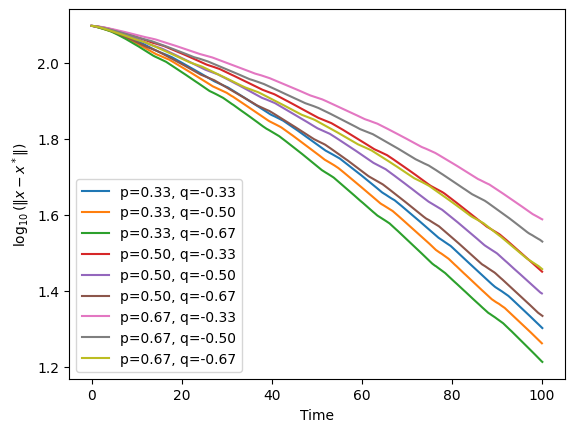

Final Objective Value: 745.300686, Solution Error (||x - X_opt||): 16.297169


In [15]:
# Parameter grid
param_grid = {
    #'la': [0.05, 0.1, 0.2, 0.5],
    'p': [1/3, 1/2, 2/3],
    'q': [-1/3, -1/2, -2/3]
    #'b1': [10, 50, 100],
    #'b2': [1,5, 10]
}
# Generate all possible combinations
param_combinations = list(product(*param_grid.values()))
print(f"Total parameter combinations: {len(param_combinations)}")

# Grid search and store results
results = []
best_loss = float('inf')
best_params = None
best_DifF = None
best_x = None

for params in param_combinations:
    param_dict = dict(zip(param_grid.keys(), params))
    x_min, grad_norm_list, Time, Dif, DifF = momentum_1_G(x0,
                                                        ga=1.8/(L+mu),
                                                        la=0.005*(L+mu),
                                                        muy = 3*(L+mu),
                                                        p=param_dict['p'],
                                                        q=param_dict['q'],
                                                        b1=100,
                                                        b2=10)
    final_loss = Dif[-1]  # Final log10(f(x) - F_min)
    print(f"Params: {param_dict}, Final Loss (log10(x - X_opt)): {final_loss:.6f}")
    results.append((param_dict, Dif,Time, final_loss))
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = param_dict
        best_Dif = Dif
        best_x = x_min

print(f"Best Parameters: {best_params}, Best Final Loss (log10(x - x^*)): {best_loss:.6f}")

# Plot all convergence curves
#min_iterations = min(len(Dif) for _, Dif, _ in results)  # Ensure same length for plotting
for param_dict, Dif, Time, final_loss in results:
    label = f"p={param_dict['p']:.2f}, q={param_dict['q']:.2f}"
    plt.plot(np.cumsum(Time), Dif, label=label)
plt.xlabel('Time')
plt.ylabel(''r'$\log_{10}(\|x-x^*\|)$')
#plt.title('Convergence of Objective Function Difference for Different Parameter Combinations')
plt.legend()
#plt.grid(True)
plt.show()

# Compute final objective value and solution error for best parameters
final_f_value = f(best_x)
final_error = np.linalg.norm(best_x - X_opt)
print(f"Final Objective Value: {final_f_value:.6f}, Solution Error (||x - X_opt||): {final_error:.6f}")

In [16]:

# Parameter grid
param_grid = {
    #'la': [0.05, 0.1, 0.2, 0.5],
    #'p': [1/3, 1/2, 2/3],
   # 'q': [-1/3, -1/2, -2/3],
    'b1': [10, 50, 100],
    'b2': [5, 10]
}

# Generate all possible combinations
param_combinations = list(product(*param_grid.values()))
print(f"Total parameter combinations: {len(param_combinations)}")


# Grid search and store results
results = []
best_loss = float('inf')
best_params = None
best_DifF = None
best_x = None

for params in param_combinations:
    param_dict = dict(zip(param_grid.keys(), params))
    x_min, grad_norm_list, Time, Dif, DifF = momentum_1_G(x0,
                                                        ga = 1.8/(L+mu),
                                                        la=0.005*(L+mu),
                                                        muy = 3*(L+mu),
                                                        p=1/3,
                                                        q=-2/3,
                                                        b1=param_dict['b1'],
                                                        b2=param_dict['b2'])
    final_loss = Dif[-1]  # Final log10(f(x) - F_min)
    print(f"Params: {param_dict}, Final Loss (log10(x - X_opt)): {final_loss:.6f}")
    results.append((param_dict, Time, Dif, final_loss))
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = param_dict
        best_Dif = Dif
        best_x = x_min

print(f"Best Parameters: {best_params}, Best Final Loss (log10(x - x^*)): {best_loss:.6f}")



Total parameter combinations: 6
Stopped by MaxTime at  764 -th iterattion
Params: {'b1': 10, 'b2': 5}, Final Loss (log10(x - X_opt)): 1.941318
Stopped by MaxTime at  765 -th iterattion
Params: {'b1': 10, 'b2': 10}, Final Loss (log10(x - X_opt)): 1.827963
Stopped by MaxTime at  763 -th iterattion
Params: {'b1': 50, 'b2': 5}, Final Loss (log10(x - X_opt)): 1.730661
Stopped by MaxTime at  764 -th iterattion
Params: {'b1': 50, 'b2': 10}, Final Loss (log10(x - X_opt)): 1.600298
Stopped by MaxTime at  765 -th iterattion
Params: {'b1': 100, 'b2': 5}, Final Loss (log10(x - X_opt)): 1.344426
Stopped by MaxTime at  762 -th iterattion
Params: {'b1': 100, 'b2': 10}, Final Loss (log10(x - X_opt)): 1.219569
Best Parameters: {'b1': 100, 'b2': 10}, Best Final Loss (log10(x - x^*)): 1.219569


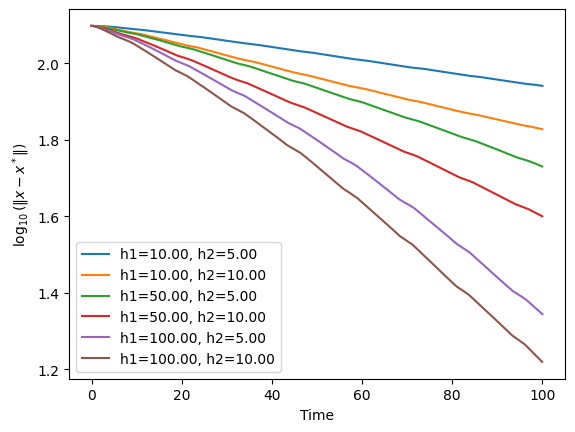

Final Objective Value: 745.302336, Solution Error (||x - X_opt||): 16.579409


In [17]:
# Plot all convergence curves
#plt.figure(figsize=(10, 6))
#min_iterations = min(len(Dif) for _, Dif, _ in results)  # Ensure same length for plotting
for param_dict, Time, Dif, final_loss in results:
    label = f"h1={param_dict['b1']:.2f}, h2={param_dict['b2']:.2f}"
    #plt.plot(Dif[:min_iterations], label=label)
    plt.plot(np.cumsum(Time), Dif, label=label)
plt.xlabel('Time')
plt.ylabel(''r'$\log_{10}(\|x-x^*\|)$')
#plt.title('Convergence of Objective Function Difference for Different Parameter Combinations')
plt.legend()
#plt.grid(True)
plt.show()

# Compute final objective value and solution error for best parameters
final_f_value = f(best_x)
final_error = np.linalg.norm(best_x - X_opt)
print(f"Final Objective Value: {final_f_value:.6f}, Solution Error (||x - X_opt||): {final_error:.6f}")

In [19]:
'''
x_minFo, grad_norm_listFo,TimeFo, Difo, DifFo = momentum_1_F(x0, ga =1.5, la=0.05, muy=5, p=1/3, q=-2/3, b1=100, b2=10)

'''

<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3490342934.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(''r'$\log_{10}(\|x-x^*\|)$')


"\nx_minFo, grad_norm_listFo,TimeFo, Difo, DifFo = momentum_1_F(x0, ga =1.5, la=0.05, muy=5, p=1/3, q=-2/3, b1=100, b2=10)\n\n#plt.figure(figsize=(4,3))\n\nplt.plot(np.cumsum(TimeF2), Dif2, color='purple', linestyle=':', label = 'IPAHDD-C2')\n\nplt.plot(np.cumsum(TimeF4), Dif4, color='orange', linestyle=':', label = ' FxTS(M)')\n\nplt.plot(np.cumsum(TimeGF1), DifGF1, color='green', linestyle='-.', label = 'GenFlow(M)')\n\n#plt.plot(np.cumsum(TimeN), DifN, color='red', linestyle='--',label='Nesterov-C')\nplt.plot(np.cumsum(TimeF5), Dif5, color='black', linestyle='-.', label = ' FGTC')\n\nplt.plot(np.cumsum(TimeF1), Dif1, color='blue', linestyle='-',label = 'FDS-S')\n\nplt.plot(np.cumsum(TimeFo), Difo, color='yellow', linestyle='-',label = 'FDS-S')\n#plt.plot(np.cumsum(TimeF1G), Dif1G, color='red', linestyle='-',label = 'FDS-S')\n#plt.plot(np.cumsum(TimeF1_1), grad_norm_listF1_1, color='red', linestyle=':', dashes=(5, 2),label = 'FDS2')\n\n\n\n\nplt.xlabel('Time')\nplt.ylabel(''r'$\\log_

In [21]:
# Parameter grid
param_grid = {
    'ga':[1.8, 1.5 ],
    'la': [0.01, 0.005,0.001],
    'muy':[3, 1]
    #'p': [1/3, 1/2, 2/3],
   # 'q': [-1/3, -1/2, -2/3],
    #'b1': [10, 50, 100],
    #'b2': [1,5, 5]
}

# Generate all possible combinations
param_combinations = list(product(*param_grid.values()))
print(f"Total parameter combinations: {len(param_combinations)}")


# Grid search and store results
results = []
best_loss = float('inf')
best_params = None
best_DifF = None
best_x = None

for params in param_combinations:
    param_dict = dict(zip(param_grid.keys(), params))
    x_min, grad_norm_list, Time, Dif, DifF = momentum_1_G(x0,
                                                        ga = param_dict['ga']/(L+mu),
                                                        la=param_dict['la']*(L+mu),
                                                        muy=param_dict['muy']*(L+mu),
                                                        p=1/3,
                                                        q=-2/3,
                                                        b1=100,
                                                        b2=10)
    final_loss = Dif[-1]  # Final log10(f(x) - F_min)
    print(f"Params: {param_dict}, Final Loss (log10(x - X_opt)): {final_loss:.6f}")
    results.append((param_dict,Time, Dif, final_loss))
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = param_dict
        best_Dif = Dif
        best_x = x_min

print(f"Best Parameters: {best_params}, Best Final Loss (log10(x - x^*)): {best_loss:.6f}")


Total parameter combinations: 12
Stopped by MaxTime at  765 -th iterattion
Params: {'ga': 1.8, 'la': 0.01, 'muy': 3}, Final Loss (log10(x - X_opt)): 1.525068
Stopped by MaxTime at  765 -th iterattion
Params: {'ga': 1.8, 'la': 0.01, 'muy': 1}, Final Loss (log10(x - X_opt)): 1.831232
Stopped by MaxTime at  772 -th iterattion
Params: {'ga': 1.8, 'la': 0.005, 'muy': 3}, Final Loss (log10(x - X_opt)): 1.204605
Stopped by MaxTime at  763 -th iterattion
Params: {'ga': 1.8, 'la': 0.005, 'muy': 1}, Final Loss (log10(x - X_opt)): 1.718772
Stopped by MaxTime at  759 -th iterattion
Params: {'ga': 1.8, 'la': 0.001, 'muy': 3}, Final Loss (log10(x - X_opt)): 1.741705
Stopped by MaxTime at  764 -th iterattion
Params: {'ga': 1.8, 'la': 0.001, 'muy': 1}, Final Loss (log10(x - X_opt)): 1.631559
Stopped by MaxTime at  760 -th iterattion
Params: {'ga': 1.5, 'la': 0.01, 'muy': 3}, Final Loss (log10(x - X_opt)): 1.601882
Stopped by MaxTime at  761 -th iterattion
Params: {'ga': 1.5, 'la': 0.01, 'muy': 1}, Fin

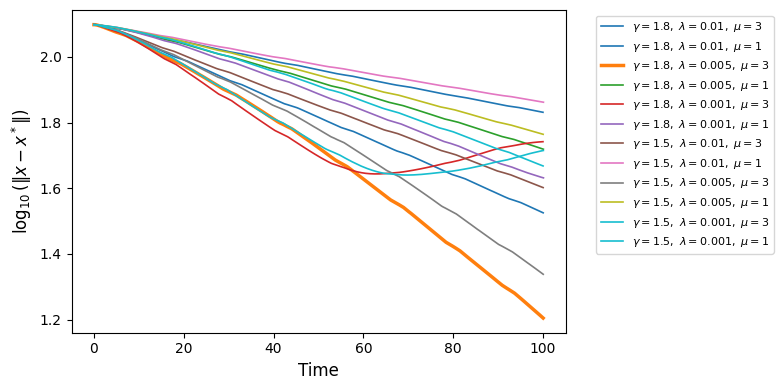

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#min_iterations = min(len(Dif) for _, Dif, _ in results)
plt.figure(figsize=(8,4))
colors = cm.tab10(np.linspace(0,1,len(results)))

for (param_dict, Time, Dif, _), c in zip(results, colors):
    label = fr"$\gamma={param_dict['ga']},\ \lambda={param_dict['la']},\ \mu={param_dict['muy']}$"
    lw = 2.5 if param_dict == best_params else 1.2  # highlight best
    #plt.plot(Dif[:min_iterations], label=label, color=c, linewidth=lw)
    plt.plot(np.cumsum(Time), Dif, label=label, color=c, linewidth=lw)

plt.xlabel('Time', fontsize=12)
plt.ylabel(r'$\log_{10}(\|x - x^*\|)$', fontsize=12)
#plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


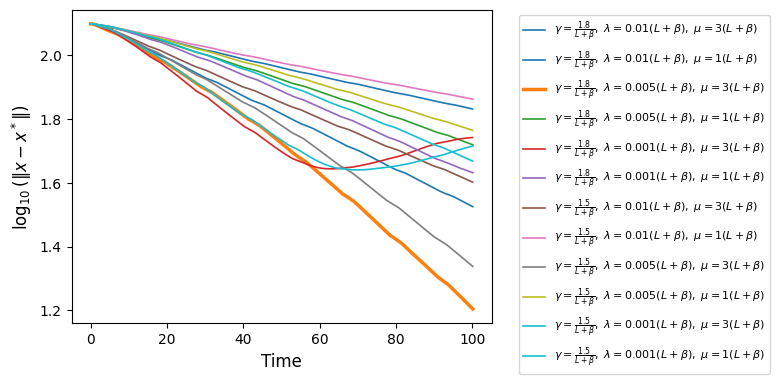

In [23]:
beta = mu
param_grid = {
    'ga':[1.8, 1.5 ],
    'la': [0.01, 0.005,0.001],
    'muy':[3, 1]
    #'p': [1/3, 1/2, 2/3],
   # 'q': [-1/3, -1/2, -2/3],
    #'b1': [10, 50, 100],
    #'b2': [1,5, 5]
}

plt.figure(figsize=(8,4))
colors = cm.tab10(np.linspace(0,1,len(results)))

for (param_dict, Time, Dif, _), c in zip(results, colors):
    gamma = param_dict['ga']/(L+beta)         # beta is a Python variable
    lam   = param_dict['la']*(L+beta)
    muy   = param_dict['muy']*(L+beta)

    # Show computed values, but write β symbolically
    label = (
        fr"$\gamma=\frac{{{param_dict['ga']}}}{{L+\beta}},\ "
        fr"\lambda={param_dict['la']}(L+\beta),\ "
        fr"\mu={param_dict['muy']}(L+\beta)$"
    )

    lw = 2.5 if param_dict == best_params else 1.2
    plt.plot(np.cumsum(Time), Dif, label=label, color=c, linewidth=lw)

plt.xlabel('Time', fontsize=12)
plt.ylabel(r'$\log_{10}(\|x - x^*\|)$', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()
